In [81]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [48]:
# Load the dataset
dataset = pd.read_csv("Data/ev_charging_patterns.csv")
dataset

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,24/02/2024 19:00,24/02/2024 20:30,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,24/02/2024 20:00,24/02/2024 20:44,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,24/02/2024 21:00,24/02/2024 23:03,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,24/02/2024 22:00,24/02/2024 23:20,13.756251,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [49]:
# Preview the dataset
print("Dataset Preview:")
print(dataset.head())



Dataset Preview:
  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location Charging Start Time Charging End Time  \
0                   Houston     01/01/2024 0:00   01/01/2024 0:39   
1             San Francisco     01/01/2024 1:00   01/01/2024 3:01   
2             San Francisco     01/01/2024 2:00   01/01/2024 4:48   
3                   Houston     01/01/2024 3:00   01/01/2024 6:42   
4               Los Angeles     01/01/2024 4:00   01/01/2024 5:46   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.3

In [50]:

# Define the dependent variable (y) and independent variables (X)
# Dependent variable: 'Charging Cost (USD)'
y = dataset['Charging Cost (USD)']


In [51]:
# Independent variables: select numeric and relevant categorical features
X = dataset[[
    'Battery Capacity (kWh)', 
    'Charging Duration (hours)', 
    'Charging Rate (kW)', 
    'Energy Consumed (kWh)', 
    'State of Charge (Start %)', 
    'State of Charge (End %)', 
    'Distance Driven (since last charge) (km)', 
    'Temperature (°C)', 
    'Vehicle Age (years)'
]]

In [52]:
# Encode categorical variables (e.g., Charger Type, User Type, Day of Week)
categorical_features = ['Charger Type', 'User Type', 'Day of Week']
X = pd.concat([X, pd.get_dummies(dataset[categorical_features], drop_first=True)], axis=1)


In [53]:
# Handle missing values (if any)
if X.isnull().sum().any():
    print("Handling missing values")
    X.fillna(X.mean(), inplace=True)


Handling missing values


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Train the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)  # Predict using the test set
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

# Display the results
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")  # Format to 2 decimal places
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 125.58
R-squared (R²): -0.00


In [77]:
# Forecast for new data 
# Rnew data to forecast
new_data = pd.DataFrame([{
    'Battery Capacity (kWh)': 90.0,
    'Charging Duration (hours)': 2.5,
    'Charging Rate (kW)': 35.0,
    'Energy Consumed (kWh)': 75.0,
    'State of Charge (Start %)': 20.0,
    'State of Charge (End %)': 80.0,
    'Distance Driven (since last charge) (km)': 150.0,
    'Temperature (°C)': 25.0,
    'Vehicle Age (years)': 3.0,
    'Charger Type_DC Fast Charger': 1,
    'Charger Type_Level 2': 0,
    'User Type_Long-Distance Traveler': 0,
    'User Type_Commuter': 1,
    'Day of Week_Monday': 1,
    'Day of Week_Tuesday': 0
}])
new_data

,Battery Capacity (kWh),Charging Duration (hours),Charging Rate (kW),Energy Consumed (kWh),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type_DC Fast Charger,Charger Type_Level 2,User Type_Long-Distance Traveler,User Type_Commuter,Day of Week_Monday,Day of Week_Tuesday
0,90.0,2.5,35.0,75.0,20.0,80.0,150.0,25.0,3.0,1,0,0,1,1,0


In [58]:
# Ensure the new data matches the features of the training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)


In [59]:
# Make prediction for new data
forecast = regressor.predict(new_data)
print("Forecasted Charging Cost (USD):")
print(forecast)

Forecasted Charging Cost (USD):
[23.89012581]


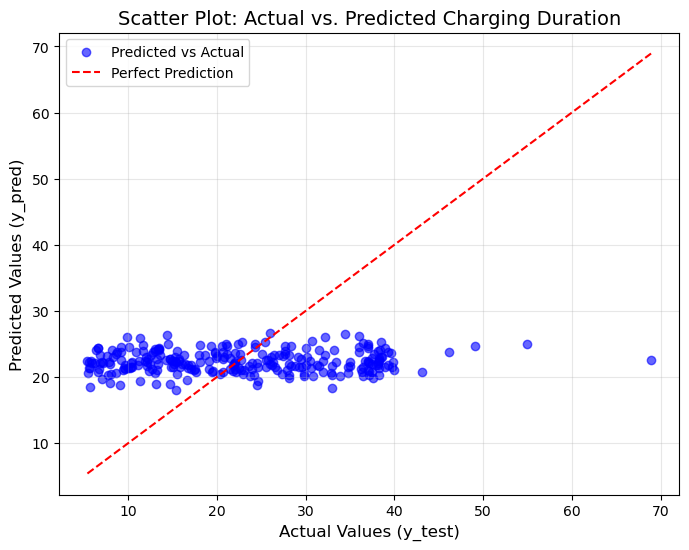

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add the diagonal line representing perfect predictions
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add labels, title, and legend
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values (y_pred)', fontsize=12)
plt.title('Scatter Plot: Actual vs. Predicted Charging Duration', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()